## Huffman Coding

- Huffman coding is a string compression algorithm that uses a binary tree to compress an arbitrary string

### Intuition and Basic Implementation

- Imagine we have a string 
  ```python
    s = "AAAAABBBBCCCDDEFG"
    # len(s) = 17
  ```

- In its raw ASCII format, each character takes up 8 bits, giving us **17 * 8 = 136 bits** for $s$
  - In ASCII, `A` is represented as an 8 bit binary "1000001" (check via `bin(ord("A"))`)
  - `B` is "1000010"
  - and so on

- But this is rather wasteful. ASCII 8 bit representation is only relevant when there are 128 characters to represent. 

- In our case, we have 7 unique characters `A,B,C,D,E,F,G`, which should only require 3 bits of information to represent? 

- Can we make use of this to compress the string? Yes!

- Let's tabulate the character counts
  | char | count | 4 bit representation |
  | --- | --- | --- | 
  | A | 5 | 000 |
  | B | 4 | 001 |
  | C | 3 | 010 |
  | D | 2 | 011 |
  | E | 1 | 100 |
  | F | 1 | 101 |
  | G | 1 | 110 |

- So in actuality, instead of **17 * 8**, we have **17 * 3**, giving us the string in 51 bits instead!

- Surprisingly though, we can do even better!

### Concept 1: Optimal Merge Pattern

- Before we get into the process of Huffman Coding, we need to understand the algorithm for optimal merge

- Optimal merge answers the question; if I have $k$ lists, of sizes $n_1 < n_2 < ... < n_k$, what is the best order to merge the lists such that I minimise the number of comparisons I make?

- In this case, to `merge` 2 lists is simply using the same `merge` algorithm as in `mergeSort()`, which happens in $O(M+N)$ time

In [9]:
def merge(list1: list, list2: list) -> list:
    p1, p2 = 0, 0
    res = []
    while p1 < len(list1) and p2 < len(list2):
        if list1[p1] <= list2[p2]:
            res.append(list1[p1])
            p1 += 1
        else:
            res.append(list2[p2])
            p2 += 1
    
    if p1 < len(list1):
        res.extend(list1[p1:])
    else:
        res.extend(list2[p2:])

    return res

merge([1,3,5],[2,4,6])

[1, 2, 3, 4, 5, 6]

- Let's suppose I have lists of the following sizes: [5,10,15,20,25]

- Let's start by merging the biggest lists first
  - 25 merges with 20 in 45 operations
  - Now we have [5,10,15,45]
  - 45 merges with 15 in 60 operations (we assume O(M+N) is literal for convenience)
  - Now we have [5,10,60]
  - 60 merges with 10 in 70 operations
  - Now we have [5,70]
  - 70 merges with 5 in 75 operations
  - This gives us a total of 45+60+70+75=250 operations

- Now this is obviously inefficient. Why? Because the largest list is constantly passed into `merge()`, and is contributing disproportionately to the number of operations required

- What if we made a small tweak, and start from the second highest list, leaving the highest list for last?
  - 20 merges with 15 in 35 operations
  - [5,10,35,25]
  - 35 merges with 10 in 45 operations
  - [5,45,25]
  - 45 merges with 5 in 50 operations
  - [50,25]
  - 25 merges with 50 in 75 operations
  - This gives us a total of 35+45+50+75=205 operations

- Why? Because we have shifted our most "expensive" merge to the end, and as a result we run fewer operations on it

- Generalising this logic, we should always leave the largest list to the end of the merge. So the optimal number of operations needed to merge [5,10,15,20,25] is
  - 5 merges with 10 in 15 operations
  - Now we have [15,15,20,25]
  - 15 merges with 15 in 30 operations
  - Now we have [30,20,25], which we **sort** to give [20,25,30]
  - 20 merges with 25 in 45 operations
  - [30,45]
  - 30 merges with 45 in 75 operations
  - This gives us a total of 15+30+45+75=165 operations

- In fact, we can visualise this merging operations as a tree traversal

- In the example above
  - "5" gets visited 3 times (5<->10, 15<->15, 30<->45)
  - "10" gets visited 3 times (5<->10, 15<->15, 30<->45)
  - "15" gets visited 2 times (15<->15, 30<->45)
  - "20" gets visited 2 times (20<->25, 30<->45)
  - "25" gets visited 2 times (20<->25, 30<->45)

  - So total operations are $\sum \text{depth}_i * \text{value}_i = 5 * 3 + 10 * 3 + 15 * 2 + 20 * 2 + 25 * 2 = 15 + 30 + 30 + 40 + 50 = 165$

  - In this case, for example, 5 is a node with depth 3


- This is known as the **Optimal Merge Algorithm**

### Non-Basic Huffman Coding

- In the first section, we implemented Huffman encoding by assigning each character a 3 bit binary string

- Surprisingly, we can do even better! The trick comes from assigning more frequently occurring characters to shorter bit strings instead

- Let's restate the problem; we have an array of counts representing the characters, and the number of times it appears in the string: [(E,1),(F,1),(G,1),(D,2),(C,3),(B,4),(A,5)]

- As we found in the optimal merge algorithm, we can rewrite this in a tree form, according to the order of their merge:
  - [(E,1),(F,1),(G,1),(D,2),(C,3),(B,4),(A,5)]
  - [1,2,2,3,4,5]
  - [2,3,3,4,5]
  - [3,4,5,5]
  - [5,5,7]
  - [7,10]
  - [17]

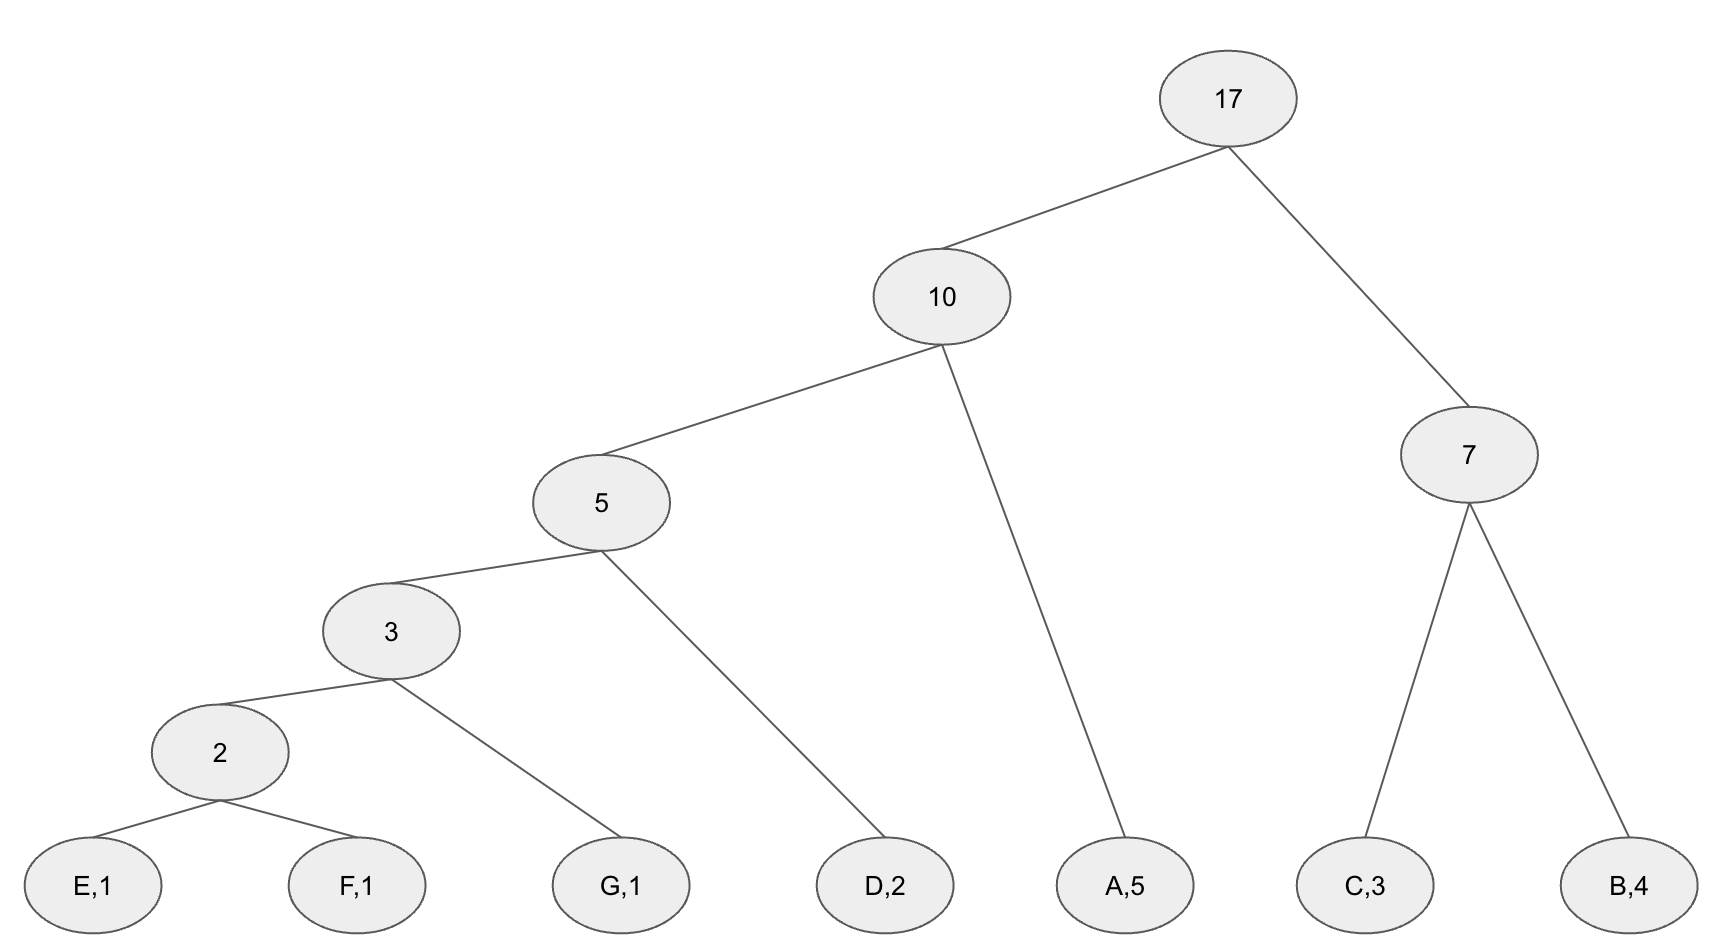

- Based on this table, let every root node be represented by the path it takes to get to it. Let a left branch be "0", and a right branch be "1"

- Then the tabulation table can be rewritten as
  | char | count | Huffman representation |
  | --- | --- | --- | 
  | A | 5 | 01 |
  | B | 4 | 11 |
  | C | 3 | 10 |
  | D | 2 | 001 |
  | E | 1 | 00000 |
  | F | 1 | 00001 |
  | G | 1 | 0001 |

- Previously, in the basic compression implementation, we see that we went from 136 bits to 51 bits

- How many bits do we get with Huffman?
  - $5*2 + 4*2 + 3*2 + 2*3 + 5*1 + 5*1 + 4*1 = 10 + 8 + 6 + 6 + 5 + 5 + 4 = 44$
  - So we go from 51 to 44 bits with Huffman encoding!

- This is the same idea an entropy, using the least bits to represent the most frequent character